# Step 1. Getting the SEED dataset

## 1.1 load the matlab format files and take a look

In [1]:
import mne
from scipy import io
import os
import numpy as np

In [2]:
folderpath = "./Preprocessed_EEG"

In [3]:
raw_1_1 = io.loadmat('./Preprocessed_EEG/1_20131027.mat')
raw_1_2 = io.loadmat('./Preprocessed_EEG/1_20131030.mat')
raw_1_3 = io.loadmat('./Preprocessed_EEG/1_20131107.mat')
# raw_2_1 = scipy.io.loadmat('./Preprocessed_EEG/2_20140404.mat')
label = io.loadmat('./Preprocessed_EEG/label.mat')

In [4]:
raw_1_1.keys(), raw_1_2.keys(), raw_1_3.keys(), label.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15']),
 dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15']),
 dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15']),
 dict_keys(['__header__', '__version__', '__globals__', 'label']))

In [5]:
raw_1_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15'])

In [6]:
raw_1_1['djc_eeg2'].shape, raw_1_2['djc_eeg2'].shape, raw_1_1['djc_eeg10'].shape, raw_1_3['djc_eeg10'].shape

((62, 46601), (62, 46601), (62, 47401), (62, 47401))

raw_1_1['djc_eeg1']:
- raw_1_1: the raw eeg data, the 1st subject(out of 15 subjects), the 1st experiments(out of 3 experiments)
- 'djc_eeg1': djc could possibly mean the name of the subject(which leaks the privacy XD), and 'eeg1' represents it is the 1st trial(out of 15 trials)
- 62: n_channels
- 47001: roughly 4 mins(240sec * 200 Hz sampling rate) the eeg signal during watching the movies

In [7]:
label['label'][0]

array([ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1],
      dtype=int16)

## 1.2 Create the torch dataset

### 1.2.1 cut compute windows

since a movie clip contains eeg signals of ~240 seconds with sf=200Hz, I decide to cut them into 4 sec windows

In [8]:
len_window = 200 * 4

raw_X = []
raw_y = []

prefix = 'djc_eeg'

# raw_1_1
for i in range(1, 16):
    data = raw_1_1[prefix + str(i)]
    # print(data.shape)
    n_windows = data.shape[1] // len_window
    # print(n_windows)
    data_list = []
    for idx in range(n_windows):
        cur_window = data[:, idx*len_window:(idx+1)*len_window]
        data_list.append(cur_window)
    reshaped_X = np.stack(data_list).transpose((1, 2, 0))
    # print(reshaped_X.shape)
    # reshaped_X = np.reshape(data[:, :n_windows * len_window], (62, len_window, n_windows))
    raw_X.append(reshaped_X)
    raw_y.append(np.array([label['label'][0][i-1] for j in range(n_windows)]))

# raw_1_2
for i in range(1, 16):
    data = raw_1_2[prefix + str(i)]
    # print(data.shape)
    n_windows = data.shape[1] // len_window
    # print(n_windows)
    data_list = []
    for idx in range(n_windows):
        cur_window = data[:, idx*len_window:(idx+1)*len_window]
        data_list.append(cur_window)
    reshaped_X = np.stack(data_list).transpose((1, 2, 0))
    # print(reshaped_X.shape)
    # reshaped_X = np.reshape(data[:, :n_windows * len_window], (62, len_window, n_windows))
    raw_X.append(reshaped_X)
    raw_y.append(np.array([label['label'][0][i-1] for j in range(n_windows)]))
    # print(reshaped_X.shape)   # print(reshaped_X.shape)

# raw_1_3
for i in range(1, 16):
    data = raw_1_3[prefix + str(i)]
    # print(data.shape)
    n_windows = data.shape[1] // len_window
    # print(n_windows)
    data_list = []
    for idx in range(n_windows):
        cur_window = data[:, idx*len_window:(idx+1)*len_window]
        data_list.append(cur_window)
    reshaped_X = np.stack(data_list).transpose((1, 2, 0))
    # print(reshaped_X.shape)
    # reshaped_X = np.reshape(data[:, :n_windows * len_window], (62, len_window, n_windows))
    raw_X.append(reshaped_X)
    raw_y.append(np.array([label['label'][0][i-1] for j in range(n_windows)]))
    # print(reshaped_X.shape)   # print(reshaped_X.shape)

In [9]:
concat_X = np.concatenate(raw_X, axis=2)
print(concat_X.shape)
concat_y = np.concatenate(raw_y)
print(concat_y.shape)

(62, 800, 2526)
(2526,)


### 1.2.2 Encode the labels

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [11]:
concat_y

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int16)

In [12]:
le = LabelEncoder()
y = le.fit_transform(concat_y)
y = pd.get_dummies(y)
y

,0,1,2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2521,1,0,0
2522,1,0,0
2523,1,0,0
2524,1,0,0


one-hot encoding
- positive:  1 => [0, 0 ,1]
- neutral:   0 => [0, 1, 0]
- negative: -1 => [1, 0, 0]

In [13]:
y.shape, concat_X.shape

((2526, 3), (62, 800, 2526))

# Step 2. Create EEG-conformer model

In [14]:
import torch
# from braindecode.models import EEGConformer
from braindecode.util import set_random_seeds

from eegconformer import EEGConformer

/home/pai/envs/fbc/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
cuda = torch.cuda.is_available()
print(cuda)
device = "cuda" if cuda else "cpu"
device

True


'cuda'

In [16]:
cuda_version = torch.version.cuda
cuda_version

'11.7'

In [17]:
seed = 20240216
set_random_seeds(seed=seed, cuda=cuda)

model = EEGConformer(
    n_outputs=3,
    n_chans=62,
    n_times=800, # input_winodw_samples
    input_window_seconds=4,
    sfreq=200,
)

print(model)

/mnt/workspace/BCI-emotion-recognition/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
EEGConformer (EEGConformer)                                  [1, 62, 800]              [1, 3]                    --                        --
├─_PatchEmbedding (patch_embedding): 1-1                     [1, 1, 62, 800]           [1, 47, 40]               --                        --
│    └─Sequential (shallownet): 2-1                          [1, 1, 62, 800]           [1, 40, 1, 47]            --                        --
│    │    └─Conv2d (0): 3-1                                  [1, 1, 62, 800]           [1, 40, 62, 776]          1,040                     [1, 25]
│    │    └─Conv2d (1): 3-2                                  [1, 40, 62, 776]          [1, 40, 1, 776]           99,240                    [62, 1]
│    │    └─BatchNorm2d (2): 3-3                             [1, 40, 1, 776]           [1, 40, 1, 776]           80             

In [18]:
if cuda:
    model.cuda()

# Step 3. Training the model

## 3.1 prepare the train set / test set

In [19]:
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib_inline

In [20]:
concat_X.shape, y.shape

((62, 800, 2526), (2526, 3))

In [21]:
X = concat_X.transpose((2, 0, 1))
X.shape

(2526, 62, 800)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=777)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1768, 62, 800), (758, 62, 800), (1768, 3), (758, 3))

## 3.2 Training

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train_tensor = torch.from_numpy(X_train).to(torch.float32).to(device)
y_train_tensor = torch.from_numpy(y_train.values).to(torch.float32).to(device)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

x_test_tensor = torch.from_numpy(X_test).to(torch.float32).to(device)
y_test_tensor = torch.from_numpy(y_test.values).to(torch.float32).to(device)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [25]:
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

In [26]:
def train(model, x_train, y_train, x_test, y_test, save_path='./model_transformer/', n_epochs=100):
    """
    the training function.
    Attributes:
    - model: the instance of the network
    - save_path: the path to which the model state will be saved. None means w/o saving.

    Return: 
    the best model if save_path is not None, the last model otherwise
    """
    train_acc_list.clear()
    train_loss_list.clear()
    test_acc_list.clear()
    test_loss_list.clear()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('the model will be trained on: ', device)

    best_accuracy = 0.0
    
    for epoch in range(n_epochs):
        training_loss = 0.0
        testing_loss = 0.0
        correct = 0
        total = 0
        
        model.train()
        for inputs, labels in tqdm(train_loader):
            # print(inputs.shape, labels.shape)
            inputs = inputs.to(device)
            labels = labels.to(device)
            # print("lables.size", labels.shape)
            optimizer.zero_grad()
            
            outputs = model(inputs)
            # print(outputs.shape)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            training_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, label = torch.max(labels, 1)
            # print(predicted.shape)
            total += labels.size(0)
            correct += (predicted == label).sum().item()
        
        train_loss = training_loss / len(train_loader)
        train_loss_list.append(train_loss)
        train_accuracy = correct / total
        train_acc_list.append(train_accuracy)

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            
            for inputs, labels in test_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                testing_loss += loss.item()


                _, predicted = torch.max(outputs.data, 1)
                _, label = torch.max(labels, 1)
                total += labels.size(0)
                correct += (predicted == label).sum().item()
            
            test_loss = testing_loss / len(test_loader)
            test_loss_list.append(test_loss)
            test_accuracy = correct / total
            test_acc_list.append(test_accuracy)

            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                if save_path is not None:
                    torch.save(model.state_dict(), save_path + 'best_model.pth')
                    print("best_model found, best acc: ", best_accuracy)
        
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")
    
    if save_path is not None: 
        model.load_state_dict(torch.load(save_path + 'best_model.pth'))
    
    return model

In [27]:
best_model = train(model, X_train, X_test, y_train, y_test, n_epochs=100)

the model will be trained on:  cuda


100%|██████████| 56/56 [00:02<00:00, 24.88it/s]


best_model found, best acc:  0.32981530343007914
Epoch 1/100 - Train Loss: 1.1594 - Train Accuracy: 0.3371 - Test Loss: 1.1455 - Test Accuracy: 0.3298


100%|██████████| 56/56 [00:01<00:00, 29.09it/s]


best_model found, best acc:  0.3548812664907652
Epoch 2/100 - Train Loss: 1.1308 - Train Accuracy: 0.3603 - Test Loss: 1.1112 - Test Accuracy: 0.3549


100%|██████████| 56/56 [00:01<00:00, 29.16it/s]


Epoch 3/100 - Train Loss: 1.1331 - Train Accuracy: 0.3456 - Test Loss: 1.1446 - Test Accuracy: 0.3509


100%|██████████| 56/56 [00:01<00:00, 29.33it/s]


best_model found, best acc:  0.3641160949868074
Epoch 4/100 - Train Loss: 1.1201 - Train Accuracy: 0.3575 - Test Loss: 1.1015 - Test Accuracy: 0.3641


100%|██████████| 56/56 [00:01<00:00, 28.90it/s]


Epoch 5/100 - Train Loss: 1.1096 - Train Accuracy: 0.3541 - Test Loss: 1.1079 - Test Accuracy: 0.3522


100%|██████████| 56/56 [00:01<00:00, 28.59it/s]


best_model found, best acc:  0.3812664907651715
Epoch 6/100 - Train Loss: 1.1087 - Train Accuracy: 0.3597 - Test Loss: 1.1050 - Test Accuracy: 0.3813


100%|██████████| 56/56 [00:01<00:00, 29.36it/s]


Epoch 7/100 - Train Loss: 1.0915 - Train Accuracy: 0.3744 - Test Loss: 1.0922 - Test Accuracy: 0.3602


100%|██████████| 56/56 [00:01<00:00, 29.32it/s]


Epoch 8/100 - Train Loss: 1.1073 - Train Accuracy: 0.3490 - Test Loss: 1.1032 - Test Accuracy: 0.3522


100%|██████████| 56/56 [00:01<00:00, 28.89it/s]


Epoch 9/100 - Train Loss: 1.0891 - Train Accuracy: 0.3665 - Test Loss: 1.1263 - Test Accuracy: 0.3641


100%|██████████| 56/56 [00:01<00:00, 28.98it/s]


Epoch 10/100 - Train Loss: 1.0976 - Train Accuracy: 0.3716 - Test Loss: 1.0959 - Test Accuracy: 0.3602


100%|██████████| 56/56 [00:01<00:00, 28.55it/s]


best_model found, best acc:  0.4050131926121372
Epoch 11/100 - Train Loss: 1.0937 - Train Accuracy: 0.3727 - Test Loss: 1.0800 - Test Accuracy: 0.4050


100%|██████████| 56/56 [00:01<00:00, 29.35it/s]


best_model found, best acc:  0.42216358839050133
Epoch 12/100 - Train Loss: 1.0713 - Train Accuracy: 0.4276 - Test Loss: 1.0729 - Test Accuracy: 0.4222


100%|██████████| 56/56 [00:01<00:00, 29.24it/s]


Epoch 13/100 - Train Loss: 1.0778 - Train Accuracy: 0.3835 - Test Loss: 1.0727 - Test Accuracy: 0.4050


100%|██████████| 56/56 [00:01<00:00, 29.16it/s]


Epoch 14/100 - Train Loss: 1.0693 - Train Accuracy: 0.4044 - Test Loss: 1.0682 - Test Accuracy: 0.4195


100%|██████████| 56/56 [00:01<00:00, 29.15it/s]


Epoch 15/100 - Train Loss: 1.0624 - Train Accuracy: 0.4089 - Test Loss: 1.1238 - Test Accuracy: 0.4103


100%|██████████| 56/56 [00:01<00:00, 28.95it/s]


Epoch 16/100 - Train Loss: 1.0766 - Train Accuracy: 0.3948 - Test Loss: 1.0665 - Test Accuracy: 0.4103


100%|██████████| 56/56 [00:01<00:00, 29.09it/s]


Epoch 17/100 - Train Loss: 1.0565 - Train Accuracy: 0.4253 - Test Loss: 1.1121 - Test Accuracy: 0.3799


100%|██████████| 56/56 [00:01<00:00, 29.46it/s]


best_model found, best acc:  0.42744063324538256
Epoch 18/100 - Train Loss: 1.0431 - Train Accuracy: 0.4333 - Test Loss: 1.1105 - Test Accuracy: 0.4274


100%|██████████| 56/56 [00:01<00:00, 29.25it/s]


Epoch 19/100 - Train Loss: 1.0476 - Train Accuracy: 0.4446 - Test Loss: 1.0773 - Test Accuracy: 0.4090


100%|██████████| 56/56 [00:01<00:00, 28.89it/s]


Epoch 20/100 - Train Loss: 1.0290 - Train Accuracy: 0.4395 - Test Loss: 1.2611 - Test Accuracy: 0.4182


100%|██████████| 56/56 [00:01<00:00, 29.21it/s]


best_model found, best acc:  0.4287598944591029
Epoch 21/100 - Train Loss: 1.0323 - Train Accuracy: 0.4576 - Test Loss: 1.2179 - Test Accuracy: 0.4288


100%|██████████| 56/56 [00:01<00:00, 29.54it/s]


Epoch 22/100 - Train Loss: 1.0137 - Train Accuracy: 0.4655 - Test Loss: 1.2043 - Test Accuracy: 0.4024


100%|██████████| 56/56 [00:01<00:00, 29.29it/s]


best_model found, best acc:  0.45118733509234826
Epoch 23/100 - Train Loss: 1.0063 - Train Accuracy: 0.4932 - Test Loss: 1.0938 - Test Accuracy: 0.4512


100%|██████████| 56/56 [00:01<00:00, 29.64it/s]


best_model found, best acc:  0.4604221635883905
Epoch 24/100 - Train Loss: 1.0017 - Train Accuracy: 0.4893 - Test Loss: 1.1370 - Test Accuracy: 0.4604


100%|██████████| 56/56 [00:01<00:00, 29.49it/s]


Epoch 25/100 - Train Loss: 0.9846 - Train Accuracy: 0.5011 - Test Loss: 1.0597 - Test Accuracy: 0.4472


100%|██████████| 56/56 [00:01<00:00, 29.42it/s]


Epoch 26/100 - Train Loss: 0.9735 - Train Accuracy: 0.5028 - Test Loss: 1.1619 - Test Accuracy: 0.4248


100%|██████████| 56/56 [00:01<00:00, 29.23it/s]


Epoch 27/100 - Train Loss: 0.9758 - Train Accuracy: 0.5339 - Test Loss: 1.0953 - Test Accuracy: 0.4485


100%|██████████| 56/56 [00:01<00:00, 28.81it/s]


Epoch 28/100 - Train Loss: 0.9660 - Train Accuracy: 0.5232 - Test Loss: 1.1137 - Test Accuracy: 0.4525


100%|██████████| 56/56 [00:02<00:00, 27.70it/s]


Epoch 29/100 - Train Loss: 0.9556 - Train Accuracy: 0.5271 - Test Loss: 1.1007 - Test Accuracy: 0.4288


100%|██████████| 56/56 [00:01<00:00, 28.31it/s]


best_model found, best acc:  0.46701846965699206
Epoch 30/100 - Train Loss: 0.9405 - Train Accuracy: 0.5260 - Test Loss: 1.0570 - Test Accuracy: 0.4670


100%|██████████| 56/56 [00:01<00:00, 28.25it/s]


Epoch 31/100 - Train Loss: 0.9251 - Train Accuracy: 0.5520 - Test Loss: 1.0375 - Test Accuracy: 0.4446


100%|██████████| 56/56 [00:01<00:00, 28.87it/s]


Epoch 32/100 - Train Loss: 0.9222 - Train Accuracy: 0.5413 - Test Loss: 1.2198 - Test Accuracy: 0.4446


100%|██████████| 56/56 [00:01<00:00, 29.21it/s]


Epoch 33/100 - Train Loss: 0.9305 - Train Accuracy: 0.5396 - Test Loss: 1.1726 - Test Accuracy: 0.4565


100%|██████████| 56/56 [00:01<00:00, 28.94it/s]


best_model found, best acc:  0.4683377308707124
Epoch 34/100 - Train Loss: 0.9263 - Train Accuracy: 0.5311 - Test Loss: 1.0226 - Test Accuracy: 0.4683


100%|██████████| 56/56 [00:01<00:00, 29.03it/s]


best_model found, best acc:  0.4736147757255937
Epoch 35/100 - Train Loss: 0.8960 - Train Accuracy: 0.5696 - Test Loss: 1.0571 - Test Accuracy: 0.4736


100%|██████████| 56/56 [00:01<00:00, 29.11it/s]


Epoch 36/100 - Train Loss: 0.9063 - Train Accuracy: 0.5594 - Test Loss: 1.0725 - Test Accuracy: 0.4710


100%|██████████| 56/56 [00:01<00:00, 29.33it/s]


best_model found, best acc:  0.48548812664907653
Epoch 37/100 - Train Loss: 0.8859 - Train Accuracy: 0.5718 - Test Loss: 1.1055 - Test Accuracy: 0.4855


100%|██████████| 56/56 [00:01<00:00, 28.70it/s]


best_model found, best acc:  0.4947229551451187
Epoch 38/100 - Train Loss: 0.8856 - Train Accuracy: 0.5713 - Test Loss: 1.0976 - Test Accuracy: 0.4947


100%|██████████| 56/56 [00:01<00:00, 28.10it/s]


Epoch 39/100 - Train Loss: 0.8837 - Train Accuracy: 0.5820 - Test Loss: 1.0705 - Test Accuracy: 0.4538


100%|██████████| 56/56 [00:01<00:00, 29.44it/s]


Epoch 40/100 - Train Loss: 0.8795 - Train Accuracy: 0.5820 - Test Loss: 1.0667 - Test Accuracy: 0.4921


100%|██████████| 56/56 [00:01<00:00, 29.04it/s]


Epoch 41/100 - Train Loss: 0.8525 - Train Accuracy: 0.5871 - Test Loss: 1.1101 - Test Accuracy: 0.4828


100%|██████████| 56/56 [00:01<00:00, 29.05it/s]


Epoch 42/100 - Train Loss: 0.8315 - Train Accuracy: 0.6137 - Test Loss: 1.1072 - Test Accuracy: 0.4921


100%|██████████| 56/56 [00:01<00:00, 28.57it/s]


best_model found, best acc:  0.5158311345646438
Epoch 43/100 - Train Loss: 0.8120 - Train Accuracy: 0.6160 - Test Loss: 1.1160 - Test Accuracy: 0.5158


100%|██████████| 56/56 [00:01<00:00, 28.96it/s]


Epoch 44/100 - Train Loss: 0.8172 - Train Accuracy: 0.6210 - Test Loss: 1.1806 - Test Accuracy: 0.4921


100%|██████████| 56/56 [00:01<00:00, 29.08it/s]


Epoch 45/100 - Train Loss: 0.8091 - Train Accuracy: 0.6216 - Test Loss: 1.1250 - Test Accuracy: 0.5066


100%|██████████| 56/56 [00:01<00:00, 29.27it/s]


best_model found, best acc:  0.5184696569920845
Epoch 46/100 - Train Loss: 0.7802 - Train Accuracy: 0.6340 - Test Loss: 1.1762 - Test Accuracy: 0.5185


100%|██████████| 56/56 [00:01<00:00, 29.18it/s]


Epoch 47/100 - Train Loss: 0.8102 - Train Accuracy: 0.6046 - Test Loss: 1.1402 - Test Accuracy: 0.5106


100%|██████████| 56/56 [00:01<00:00, 28.86it/s]


Epoch 48/100 - Train Loss: 0.7636 - Train Accuracy: 0.6612 - Test Loss: 1.1013 - Test Accuracy: 0.5040


100%|██████████| 56/56 [00:01<00:00, 29.14it/s]


Epoch 49/100 - Train Loss: 0.7887 - Train Accuracy: 0.6431 - Test Loss: 1.0502 - Test Accuracy: 0.5066


100%|██████████| 56/56 [00:01<00:00, 29.18it/s]


best_model found, best acc:  0.5263852242744064
Epoch 50/100 - Train Loss: 0.7538 - Train Accuracy: 0.6555 - Test Loss: 1.1507 - Test Accuracy: 0.5264


100%|██████████| 56/56 [00:01<00:00, 29.08it/s]


Epoch 51/100 - Train Loss: 0.7428 - Train Accuracy: 0.6623 - Test Loss: 1.2572 - Test Accuracy: 0.5172


100%|██████████| 56/56 [00:01<00:00, 29.27it/s]


Epoch 52/100 - Train Loss: 0.7333 - Train Accuracy: 0.6782 - Test Loss: 1.1867 - Test Accuracy: 0.5237


100%|██████████| 56/56 [00:01<00:00, 29.11it/s]


Epoch 53/100 - Train Loss: 0.7108 - Train Accuracy: 0.6883 - Test Loss: 1.1210 - Test Accuracy: 0.5066


100%|██████████| 56/56 [00:01<00:00, 29.20it/s]


Epoch 54/100 - Train Loss: 0.7169 - Train Accuracy: 0.6680 - Test Loss: 1.2288 - Test Accuracy: 0.5264


100%|██████████| 56/56 [00:01<00:00, 29.09it/s]


Epoch 55/100 - Train Loss: 0.7174 - Train Accuracy: 0.6759 - Test Loss: 1.1738 - Test Accuracy: 0.5040


100%|██████████| 56/56 [00:01<00:00, 29.36it/s]


Epoch 56/100 - Train Loss: 0.6864 - Train Accuracy: 0.6833 - Test Loss: 1.1800 - Test Accuracy: 0.5251


100%|██████████| 56/56 [00:01<00:00, 28.90it/s]


best_model found, best acc:  0.5277044854881267
Epoch 57/100 - Train Loss: 0.6808 - Train Accuracy: 0.7048 - Test Loss: 1.1570 - Test Accuracy: 0.5277


100%|██████████| 56/56 [00:01<00:00, 28.80it/s]


Epoch 58/100 - Train Loss: 0.6930 - Train Accuracy: 0.6810 - Test Loss: 1.3012 - Test Accuracy: 0.5172


100%|██████████| 56/56 [00:01<00:00, 29.33it/s]


Epoch 59/100 - Train Loss: 0.6890 - Train Accuracy: 0.6985 - Test Loss: 1.4169 - Test Accuracy: 0.5145


100%|██████████| 56/56 [00:01<00:00, 28.63it/s]


Epoch 60/100 - Train Loss: 0.6748 - Train Accuracy: 0.7036 - Test Loss: 1.3320 - Test Accuracy: 0.5211


100%|██████████| 56/56 [00:01<00:00, 29.01it/s]


Epoch 61/100 - Train Loss: 0.6544 - Train Accuracy: 0.7031 - Test Loss: 1.3167 - Test Accuracy: 0.5264


100%|██████████| 56/56 [00:01<00:00, 28.06it/s]


best_model found, best acc:  0.5290237467018469
Epoch 62/100 - Train Loss: 0.6400 - Train Accuracy: 0.7195 - Test Loss: 1.4582 - Test Accuracy: 0.5290


100%|██████████| 56/56 [00:01<00:00, 28.95it/s]


best_model found, best acc:  0.5329815303430079
Epoch 63/100 - Train Loss: 0.6680 - Train Accuracy: 0.7144 - Test Loss: 1.2937 - Test Accuracy: 0.5330


100%|██████████| 56/56 [00:01<00:00, 29.19it/s]


Epoch 64/100 - Train Loss: 0.5928 - Train Accuracy: 0.7325 - Test Loss: 1.5667 - Test Accuracy: 0.5158


100%|██████████| 56/56 [00:01<00:00, 28.88it/s]


Epoch 65/100 - Train Loss: 0.6078 - Train Accuracy: 0.7268 - Test Loss: 1.4538 - Test Accuracy: 0.4908


100%|██████████| 56/56 [00:01<00:00, 29.12it/s]


Epoch 66/100 - Train Loss: 0.6039 - Train Accuracy: 0.7336 - Test Loss: 1.4767 - Test Accuracy: 0.5290


100%|██████████| 56/56 [00:01<00:00, 28.03it/s]


Epoch 67/100 - Train Loss: 0.6002 - Train Accuracy: 0.7426 - Test Loss: 1.6540 - Test Accuracy: 0.5000


100%|██████████| 56/56 [00:01<00:00, 29.10it/s]


Epoch 68/100 - Train Loss: 0.6139 - Train Accuracy: 0.7308 - Test Loss: 1.6523 - Test Accuracy: 0.5013


100%|██████████| 56/56 [00:01<00:00, 29.52it/s]


Epoch 69/100 - Train Loss: 0.6072 - Train Accuracy: 0.7426 - Test Loss: 1.5723 - Test Accuracy: 0.5198


100%|██████████| 56/56 [00:01<00:00, 29.72it/s]


Epoch 70/100 - Train Loss: 0.5782 - Train Accuracy: 0.7675 - Test Loss: 1.6529 - Test Accuracy: 0.4987


100%|██████████| 56/56 [00:01<00:00, 29.32it/s]


Epoch 71/100 - Train Loss: 0.5562 - Train Accuracy: 0.7590 - Test Loss: 1.5838 - Test Accuracy: 0.5066


100%|██████████| 56/56 [00:01<00:00, 28.55it/s]


Epoch 72/100 - Train Loss: 0.5569 - Train Accuracy: 0.7681 - Test Loss: 1.6370 - Test Accuracy: 0.5172


100%|██████████| 56/56 [00:01<00:00, 29.39it/s]


Epoch 73/100 - Train Loss: 0.5448 - Train Accuracy: 0.7721 - Test Loss: 1.6077 - Test Accuracy: 0.5277


100%|██████████| 56/56 [00:01<00:00, 29.19it/s]


Epoch 74/100 - Train Loss: 0.5170 - Train Accuracy: 0.7868 - Test Loss: 1.7396 - Test Accuracy: 0.5224


100%|██████████| 56/56 [00:01<00:00, 29.04it/s]


best_model found, best acc:  0.5408970976253298
Epoch 75/100 - Train Loss: 0.5426 - Train Accuracy: 0.7692 - Test Loss: 1.6578 - Test Accuracy: 0.5409


100%|██████████| 56/56 [00:01<00:00, 28.98it/s]


Epoch 76/100 - Train Loss: 0.5188 - Train Accuracy: 0.7811 - Test Loss: 1.6371 - Test Accuracy: 0.5290


100%|██████████| 56/56 [00:01<00:00, 29.36it/s]


Epoch 77/100 - Train Loss: 0.5292 - Train Accuracy: 0.7760 - Test Loss: 1.8009 - Test Accuracy: 0.5172


100%|██████████| 56/56 [00:01<00:00, 29.80it/s]


Epoch 78/100 - Train Loss: 0.5097 - Train Accuracy: 0.7998 - Test Loss: 1.8805 - Test Accuracy: 0.5198


100%|██████████| 56/56 [00:01<00:00, 29.64it/s]


Epoch 79/100 - Train Loss: 0.5065 - Train Accuracy: 0.7834 - Test Loss: 1.7978 - Test Accuracy: 0.5092


100%|██████████| 56/56 [00:01<00:00, 29.57it/s]


Epoch 80/100 - Train Loss: 0.4947 - Train Accuracy: 0.7958 - Test Loss: 1.7062 - Test Accuracy: 0.5330


100%|██████████| 56/56 [00:01<00:00, 28.92it/s]


Epoch 81/100 - Train Loss: 0.4804 - Train Accuracy: 0.8032 - Test Loss: 2.0354 - Test Accuracy: 0.5264


100%|██████████| 56/56 [00:01<00:00, 29.25it/s]


Epoch 82/100 - Train Loss: 0.4438 - Train Accuracy: 0.8190 - Test Loss: 1.8166 - Test Accuracy: 0.5211


100%|██████████| 56/56 [00:01<00:00, 28.97it/s]


Epoch 83/100 - Train Loss: 0.4920 - Train Accuracy: 0.7902 - Test Loss: 1.7556 - Test Accuracy: 0.5079


100%|██████████| 56/56 [00:01<00:00, 29.43it/s]


Epoch 84/100 - Train Loss: 0.4635 - Train Accuracy: 0.8139 - Test Loss: 1.8421 - Test Accuracy: 0.5343


100%|██████████| 56/56 [00:01<00:00, 29.30it/s]


Epoch 85/100 - Train Loss: 0.4628 - Train Accuracy: 0.8088 - Test Loss: 1.6578 - Test Accuracy: 0.5277


100%|██████████| 56/56 [00:02<00:00, 27.48it/s]


Epoch 86/100 - Train Loss: 0.4422 - Train Accuracy: 0.8145 - Test Loss: 1.8086 - Test Accuracy: 0.5237


100%|██████████| 56/56 [00:01<00:00, 28.95it/s]


Epoch 87/100 - Train Loss: 0.4404 - Train Accuracy: 0.8213 - Test Loss: 1.9624 - Test Accuracy: 0.5264


100%|██████████| 56/56 [00:01<00:00, 29.28it/s]


Epoch 88/100 - Train Loss: 0.4309 - Train Accuracy: 0.8230 - Test Loss: 1.5511 - Test Accuracy: 0.5264


100%|██████████| 56/56 [00:01<00:00, 28.94it/s]


Epoch 89/100 - Train Loss: 0.4225 - Train Accuracy: 0.8428 - Test Loss: 2.0436 - Test Accuracy: 0.5198


100%|██████████| 56/56 [00:01<00:00, 29.08it/s]


Epoch 90/100 - Train Loss: 0.4014 - Train Accuracy: 0.8258 - Test Loss: 1.9033 - Test Accuracy: 0.5066


100%|██████████| 56/56 [00:01<00:00, 28.01it/s]


Epoch 91/100 - Train Loss: 0.3958 - Train Accuracy: 0.8371 - Test Loss: 2.0828 - Test Accuracy: 0.5092


100%|██████████| 56/56 [00:01<00:00, 28.94it/s]


Epoch 92/100 - Train Loss: 0.3801 - Train Accuracy: 0.8467 - Test Loss: 2.3028 - Test Accuracy: 0.5185


100%|██████████| 56/56 [00:01<00:00, 28.94it/s]


Epoch 93/100 - Train Loss: 0.4074 - Train Accuracy: 0.8269 - Test Loss: 2.0868 - Test Accuracy: 0.5303


100%|██████████| 56/56 [00:01<00:00, 29.17it/s]


Epoch 94/100 - Train Loss: 0.3997 - Train Accuracy: 0.8416 - Test Loss: 1.8533 - Test Accuracy: 0.5119


100%|██████████| 56/56 [00:01<00:00, 28.47it/s]


Epoch 95/100 - Train Loss: 0.3684 - Train Accuracy: 0.8552 - Test Loss: 1.9687 - Test Accuracy: 0.5211


100%|██████████| 56/56 [00:01<00:00, 29.02it/s]


Epoch 96/100 - Train Loss: 0.3926 - Train Accuracy: 0.8473 - Test Loss: 2.0453 - Test Accuracy: 0.5132


100%|██████████| 56/56 [00:01<00:00, 29.32it/s]


Epoch 97/100 - Train Loss: 0.3763 - Train Accuracy: 0.8609 - Test Loss: 2.0645 - Test Accuracy: 0.5224


100%|██████████| 56/56 [00:01<00:00, 29.18it/s]


Epoch 98/100 - Train Loss: 0.3908 - Train Accuracy: 0.8422 - Test Loss: 1.9877 - Test Accuracy: 0.4960


100%|██████████| 56/56 [00:01<00:00, 29.43it/s]


Epoch 99/100 - Train Loss: 0.3836 - Train Accuracy: 0.8484 - Test Loss: 1.9564 - Test Accuracy: 0.5251


100%|██████████| 56/56 [00:01<00:00, 29.10it/s]


Epoch 100/100 - Train Loss: 0.3647 - Train Accuracy: 0.8529 - Test Loss: 2.2861 - Test Accuracy: 0.5198


# Step 4. Assessment

## 4.1 Training plot

In [28]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'epoch')

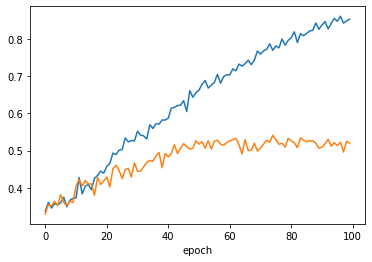

In [29]:
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

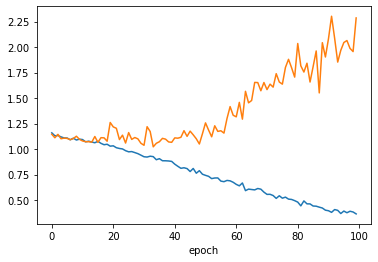

In [30]:
plt.plot(train_loss_list, label='train_loss')
plt.plot(test_loss_list, label='test_loss')
plt.xlabel('epoch')

## 4.2 Model Evaluation

In [31]:
best_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += labels.size(0)
        correct += (predicted == label).sum().item()
    
    test_accuracy = correct / total

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.5409
